In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

from classify import image_centroids, sample_image
from image_mapping import image2hs_sample_map, image2hsl
from vector_mapping import VectorMap

In [2]:
%matplotlib notebook

In [3]:
im = np.array(Image.open('lib/images/4xmr5mpelir51.jpg'))
centroids = image_centroids(im, 2)
centroids

array([[ 22.20695209,  19.57938532,  65.28653872],
       [ 96.00736434,  88.43682171, 192.67790698]])

In [4]:
ims = sample_image(im, 10000)

In [5]:
samples = np.array([[0.3, 0.3], [0.5, 0.7], [0.1, 0.8]])

<IPython.core.display.Javascript object>


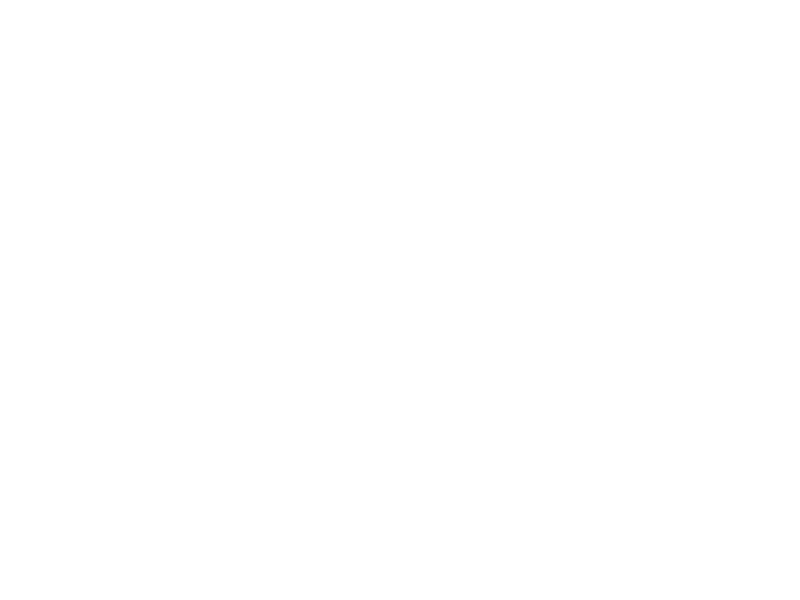

In [6]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*ims.transpose(), alpha=0.1, s=10)
ax.scatter(*centroids.transpose(), s=300, alpha=1, marker='o')

In [7]:
im_hsl = image2hsl(im)
centroids_hsl = image_centroids(im_hsl, 3)
centroids_hsl

array([[0.6689356 , 0.73829997, 0.13663982],
       [0.74335478, 0.47967618, 0.28014594],
       [0.65151765, 0.84295768, 0.50450392]])

In [8]:
ims_hsl = sample_image(im_hsl, 10000)

<IPython.core.display.Javascript object>


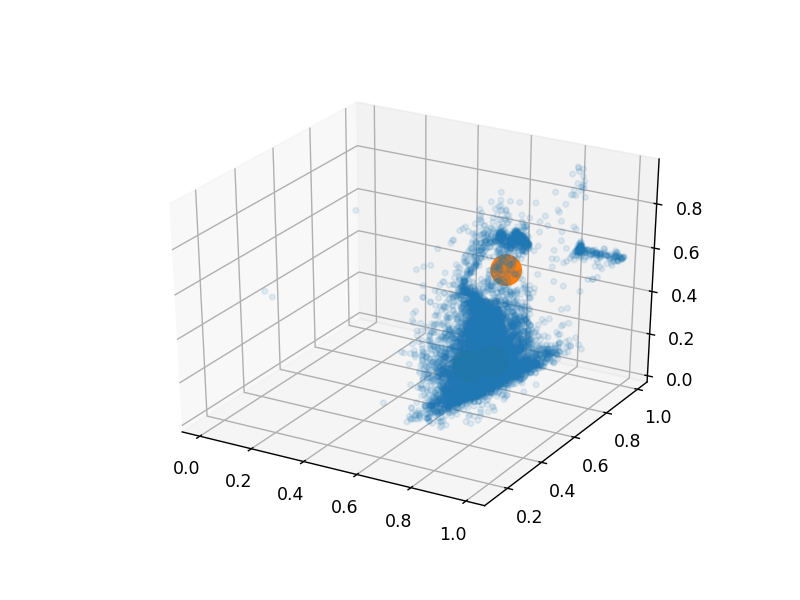

In [9]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*ims_hsl.transpose(), alpha=0.1, s=10)
ax.scatter(*centroids_hsl.transpose(), s=300, alpha=1, marker='o')

In [10]:
m_im = image2hs_sample_map(im[:, :, [0, 2, 1]], [[0.3, 0.3], [0.5, 0.7], [0.1, 0.8]])

In [11]:
centroids_hs = np.delete(centroids_hsl, 2, 1)
centroids_hs

array([[0.6689356 , 0.73829997],
       [0.74335478, 0.47967618],
       [0.65151765, 0.84295768]])

In [12]:
im_hs = np.delete(im_hsl, 2, 2)
im_hs.shape

(540, 960, 2)

In [13]:
vm = VectorMap(*centroids_hs.transpose(), *samples.transpose(), wt=[1, 1])

<IPython.core.display.Javascript object>


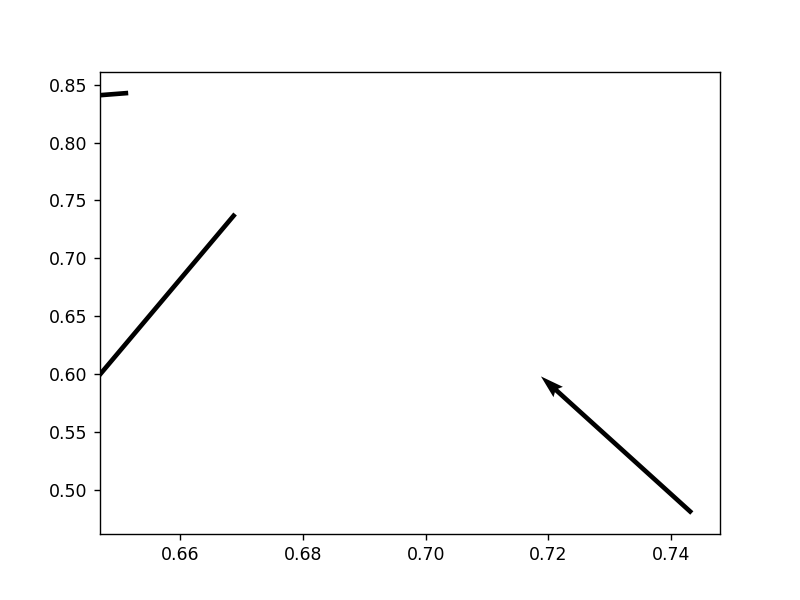

In [14]:
plt.figure()
plt.quiver(*centroids_hs.transpose(), *vm.sample_vectors(), scale=1)

In [15]:
w = vm._weight_funcs()
w_im = w(im_hs.transpose(2, 0, 1))

<IPython.core.display.Javascript object>


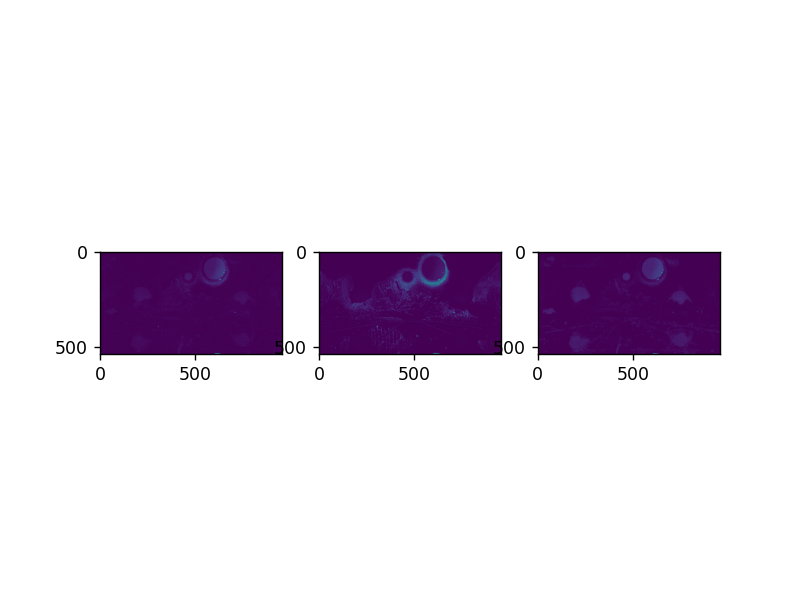

In [16]:
plt.figure()
for i in range(w_im.shape[0]):
    plt.subplot(1, w_im.shape[0], i+1)
    plt.imshow(w_im[i])

In [17]:
pq_norms = vm.sample_vector_norms()
pq_norms

array([[-0.64397323, -0.74131495, -0.99698031],
       [-0.76504802,  0.67115732, -0.07765474]])

In [18]:
wpq = np.sum(w_im[None, :, :, :] * pq_norms[:, :, None, None], axis=1)
wpq.shape

(2, 540, 960)

<IPython.core.display.Javascript object>


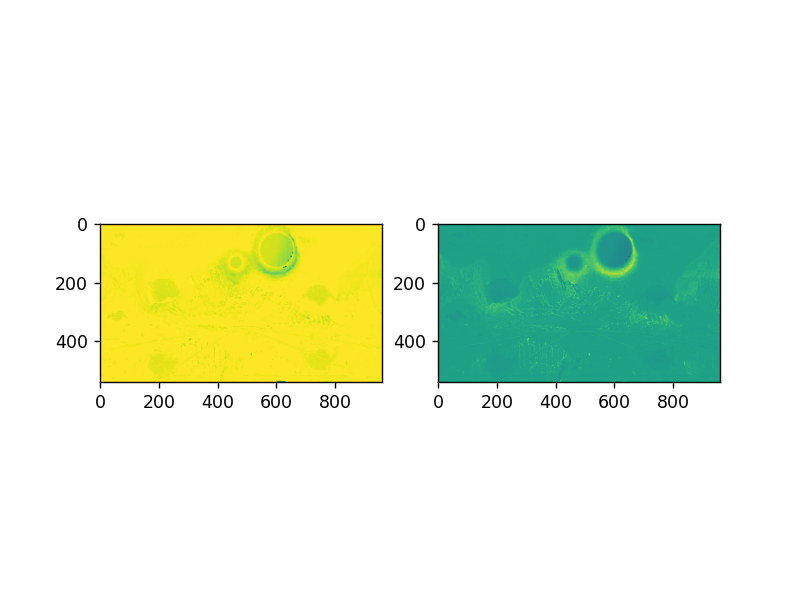

In [19]:
plt.figure()
for i in range(wpq.shape[0]):
    plt.subplot(1, wpq.shape[0], i+1)
    plt.imshow(wpq[i])

In [20]:
print(vm._px, vm._py, vm._qx, vm._qy)

[0.6689356  0.74335478 0.65151765] [0.73829997 0.47967618 0.84295768] [0.3 0.5 0.1] [0.3 0.7 0.8]


In [21]:
vm.sample_vectors()

array([[-0.3689356 , -0.24335478, -0.55151765],
       [-0.43829997,  0.22032382, -0.04295768]])

In [22]:
wsum = np.sum(w_im, axis=0)
wsum.shape

(540, 960)

<IPython.core.display.Javascript object>


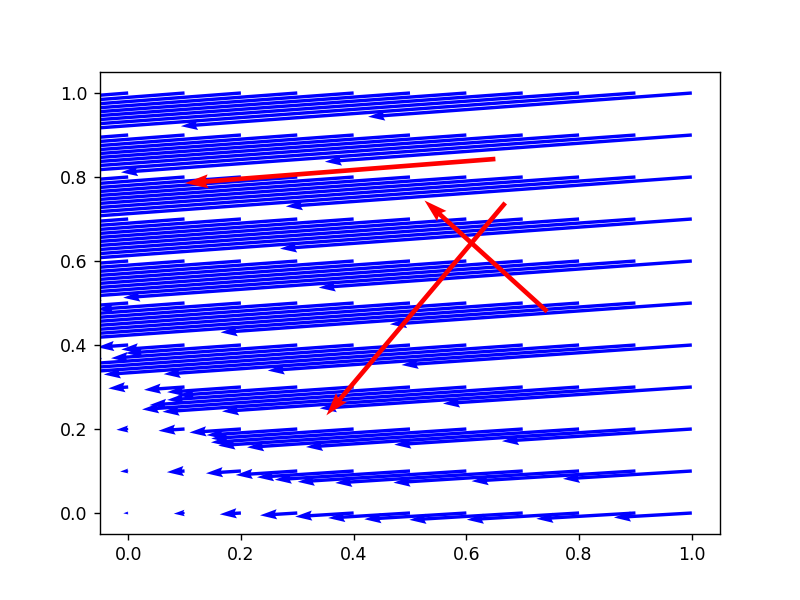

In [23]:
x1, y1 = np.linspace(0, 1, 11), np.linspace(0, 1, 11)
x = np.meshgrid(x1, y1)

plt.figure()
plt.quiver(*x, *vm.velocity_func()(x), color='blue', scale_units='xy', scale=1)
plt.quiver(*centroids_hs.transpose(), *vm.sample_vectors(), color='red', scale_units='xy', scale=1)

In [24]:
m_im = image2hs_sample_map(im, samples)

In [25]:
np.min(m_im)

0.0

<IPython.core.display.Javascript object>


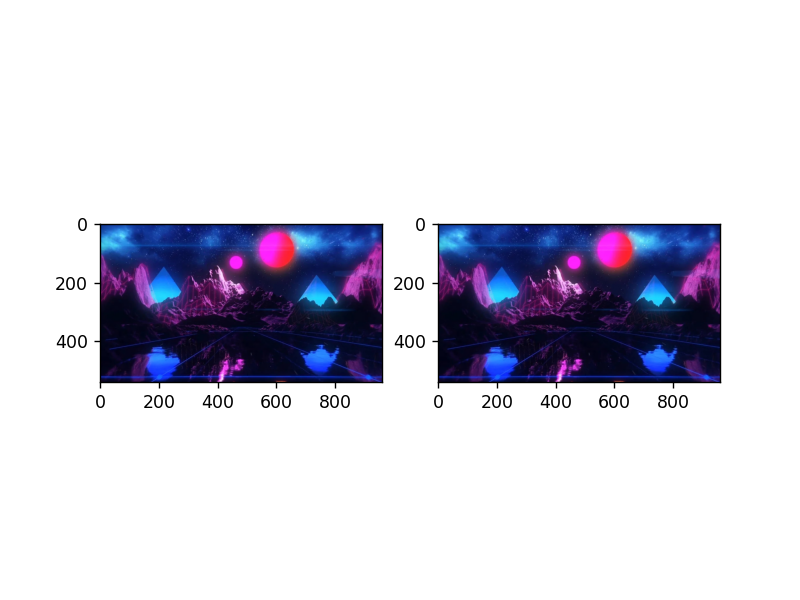

In [26]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.subplot(1, 2, 2)
plt.imshow(m_im.transpose(1, 2, 0).astype(int))